<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to DBSCAN


---

<a id="learning-objectives"></a>
<a id="learning-objectives"></a>
### Learning Objectives
- Introduce the DBSCAN algorithm
- Explain how DBSCAN works
- Compare DBSCAN to K-Means and Hierarchical Clustering
- See DBSCAN in Sklearn

<a id="review-of-clustering"></a>
## Review of clustering
---

- Clustering is an unsupervised learning technique we employ to group “similar” data points together
- With unsupervised learning, remember: there is no clear objective, there is no “right answer” (hard to tell how we’re doing), there is no response variable, just observations with features, and labeled data is not required

![](./assets/images/clusters.png)

<a id="k-means"></a>
### K-means
![](./assets/images/Kmeans_animation.gif)

**Pros:**
- Easy to implement even on relatively large data sets ( ~$O(n)$ )
- Usually "good enough" results

**Cons:**
- Requires an arbitrary k
- Sensitive to outliers (k-medians is more robust)
- With random initial centroids lacks repeatability (but can be seeded)
- Works best if data conforms to circular -> spherical -> hyperspherical shape (n.b. using means)
- Works best with similar density clusters

<a id="hierarchical-clustering"></a>
### Hierarchical Clustering

![](./assets/images/agglomerative-clustering.gif)

**Pros:**
- No need to pick explicit k (...but kind of because we need to pick a split point)
- Repeatability/Deterministic model (always get the same clusters) 
- Can dial cluster levels at will
    
**Cons:**
- Runs in $~O(n^2)$ time - so must be relatively small dataset
- Requires selecting a linkage method

## What about outliers?

For these algos, is every data point assigned to a cluster?

Should they be?

## What is DBSCAN?

- DBSCAN: Density-based Spatial Clustering of Applications with Noise
- For DBSCAN, clusters of high density are separated by clusters of low density
- DBSCAN is the most widely used and applicable clustering algorithm 
    - given that it takes minimum predefined input and can discover clusters of any shape, not just the sphere-like clusters that k-means often computes. This way, we can discover less pre-defined patterns and glean some more useful insights.
    


**Why Density?**

Because DBSCAN uses a neighbor-based polling approach. It is ideal for clusters of that have similar variance.

**Why noise?**

Because not every point will be associated with a cluster. Some are left as outlier points.

<a id="how-does-dbscan-work"></a>
## How does DBSCAN work?
---

- DBSCAN is a density based clustering algorithm, meaning that the algorithm
finds clusters by seeking areas of the dataset that have a higher density of points
than the rest of the dataset.
- Given this, unlike in our previous examples, after you apply DBSCAN there may be data points that aren't assigned to any cluster at all!

<a id="the-parameters"></a>
### The Parameters
When we use DBSCAN, it requires two input parameters: 

**Min Points** - This is the minimum number of points required to form a cluster.

**Epsilon** - This is the maximum spanning distance that a point can be from the polling point in order to be recruited to the cluster.

<a id="the-dbscan-algorithm"></a>
<a id="the-dbscan-algorithm"></a>
### The DBSCAN Algorithm:
1. Choose an “epsilon” and “min_samples”
2. Pick an arbitrary point, and check if there are at least “min_samples” points
within distance “epsilon”
    - If yes, add those points to the cluster and check each of the new points
    - If no, choose another arbitrary point to start a new cluster
3. Stop once all points have been checked

![](./assets/images/dbscan.png)

<a id="algorithm-visualization"></a>
<a id="algorithm-visualization"></a>
### Algorithm visualization
- http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- Let’s play with this a bit!


<a id="how-does-dbscan-compare-to-k-means-and-hierarchical-clustering"></a>
## How does DBSCAN compare to K-means and Hierarchical Clustering?


K-means can be thought of as a "general" clustering approach.  DBSCAN performs especially well with unevenly distributed, non-linear clusters.

The fundamental difference with DBSCAN lies in the fact that it is density based, as opposed to k-means which calculates clusters based on distance from a central point, or hierarchical clustering.

By choosing too few points for DBSCAN, i.e. less than two, we'll effectively get a straight line if we connect the points, just like linkage clustering.

> *Note:* if you set the criteria for minimum points too low with DBSCAN (< 2), this becomes essentially the same result as hierarchical clustering. To diversify the DBSCAN, we therefore must give it a significant amount of points to form a cluster.

<a id="pros-and-cons"></a>
### Pros and Cons
DBSCAN can be useful to us when we have a lot of dense data. If we used kmeans
on this data, the algorithm would effectively give us just one large cluster!
However with DBSCAN, we can actually break down this cluster into smaller
groups to see their attributes.

**Advantages:**
- Clusters can be any size or shape
- No need to choose number of clusters
    

**Disadvantages:**
- More parameters to tune
- Doesn’t work with clusters of varying density
<br><br>

NOTE: Not every point is assigned to a cluster!

### Key outputs
The DBSCAN algorithm in Python returns two items - the core samples and the
labels. The core samples are the points which the algorithm initially finds and
searches around the neighborhood to form the cluster, and the labels are simply
the cluster labels.



## How do you know what good estimates of epsilon and min pts are?


As a general rule when choosing the minimum points - you should always aim to have the **minimum number of points be greater or equal to the amount of dimensions in your data, plus one**. This typically will give the algorithm a good estimation of how to evaluate the clusters. 



## Let's see an example

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# load the data
iris = datasets.load_iris()

# identify target and features
X, y = iris.data, iris.target

# feature names
feature_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']
# Standardize X
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=feature_names)


## How many clusters do we see?

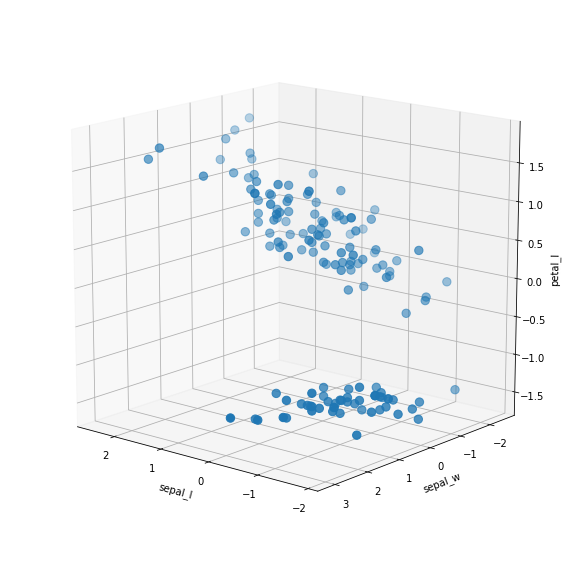

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['sepal_l'], X['sepal_w'], X['petal_l'], s=70)
ax.set(xlabel='sepal_l',ylabel="sepal_w",zlabel="petal_l")
ax.view_init(15, 130)
plt.draw()

## Run DBSCAN
Let's use 5 min points (num dimensions + 1)

In [17]:
# setup DBSCAN
dbscn = DBSCAN(eps = .6, min_samples = 5).fit(X)

## What do the labels mean?  How many clusters did I get?

In [18]:
labels = dbscn.labels_
print labels


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


## What are the core samples?

In [19]:
dbscn.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  34,  35,  36,  37,  38,  39,  40,  42,  43,  44,
        45,  46,  47,  48,  49,  51,  52,  53,  54,  55,  58,  61,  63,
        64,  65,  66,  67,  69,  70,  71,  73,  74,  75,  77,  78,  79,
        80,  81,  82,  83,  84,  86,  88,  89,  90,  91,  92,  94,  95,
        96,  97,  99, 100, 101, 102, 103, 104, 110, 111, 112, 115, 116,
       120, 123, 124, 126, 127, 128, 132, 133, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 147, 149])

## Visualize the clusters 

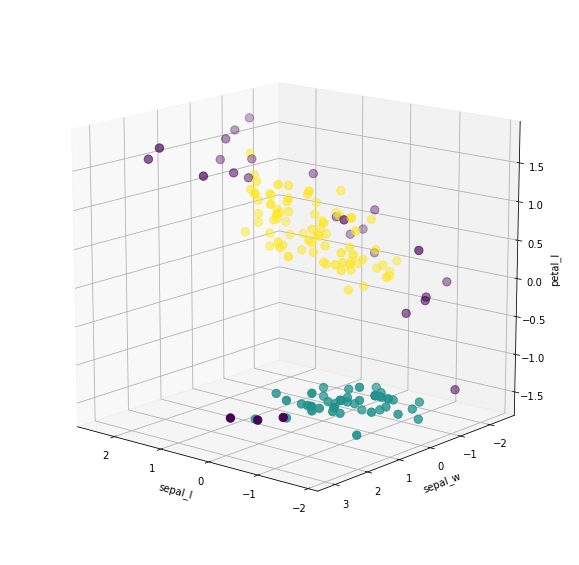

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['sepal_l'], X['sepal_w'], X['petal_l'], c=labels, s=70)

ax.set(xlabel='sepal_l',ylabel="sepal_w",zlabel="petal_l")
ax.view_init(15, 130)
plt.draw()

## Let's find the core samples

In [21]:
# identify core samples
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscn.core_sample_indices_] = True
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True False False  True False
 False  True False  True  True  True  True  True False  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True  True False False False
 False False  True  True  True False False  True  True False False False
  True False False  True  True False  True  True  True False False False
  True  True False False  True  True  True  True  True  True  True  True
  True  True False  True False  True]


## Let's identify the core samples

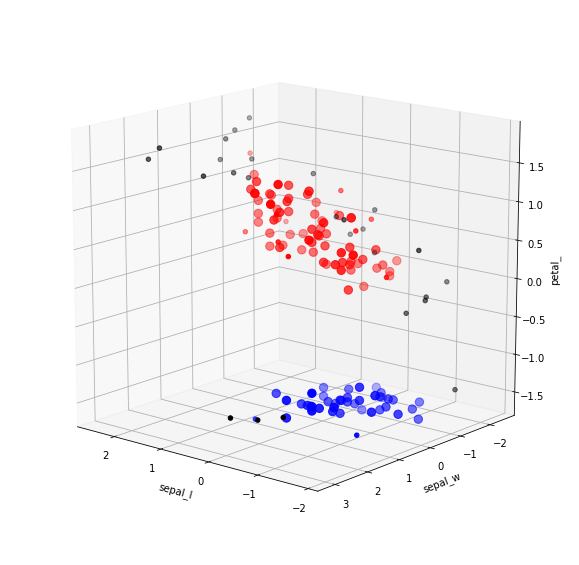

In [22]:
X['labels'] = labels
X['core'] = [i*50 + 20 for i in core_samples]
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colours = ['b', 'r', 'k']

for l, c in zip(list(set(labels)), colours):
    sub = X[X['labels']==l]
    s = sub['core']
    ax.scatter(sub['sepal_l'], sub['sepal_w'], sub['petal_l'], s=s, c=c)
  
ax.set(xlabel="sepal_l",ylabel="sepal_w",zlabel="petal_")

ax.view_init(15, 130)
plt.draw()

## Let's see an example of where DBSCAN excels!

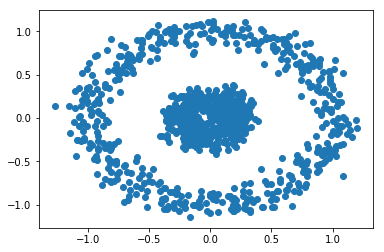

In [23]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(circles_X[:,0], circles_X[:,1])

In [24]:
X = StandardScaler().fit_transform(circles_X)

In [25]:
dbscn = DBSCAN(eps = .5, min_samples = 3).fit(X)
labels = dbscn.labels_  
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.238


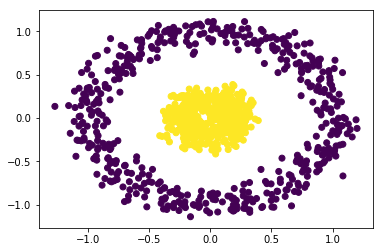

In [26]:
plt.scatter(circles_X[:,0], circles_X[:,1], c=labels)

## How does Kmeans do?  Let's assume we even knew ahead of time that there were 2 clusters...

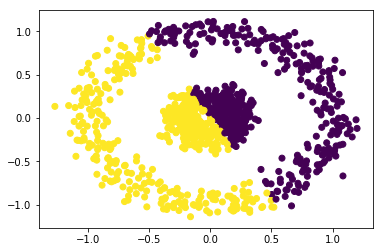

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X)
plt.scatter(circles_X[:,0], circles_X[:,1], c=km.labels_)

## Conclusion

- DBSCAN works well for clustering in the way people tend to imagine clusters
- It takes two parameters: epsilon and min points
- Computationally, it runs somewhere between k-means and HAC

<a id="additional-resources"></a>
<a id="additional-resources"></a>
## Additional resources

From the documentation http://scikitlearn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html